In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
DATASET_PATH = r"C://Users//AbdelRahman//Desktop//Eleveoo Pathways Internship//Data//genres_original"

In [5]:
# Parameters
SAMPLES_TO_CONSIDER = 22050 * 30  # 30 sec clips
N_MFCC = 40


In [6]:
# Genres in GTZAN
genres = os.listdir(DATASET_PATH)

def extract_features(file_path, n_mfcc=N_MFCC):
    try:
        # Load audio
        y, sr = librosa.load(file_path, duration=30, sr=None)
        # Ensure same length
        if len(y) < SAMPLES_TO_CONSIDER:
            y = np.pad(y, (0, SAMPLES_TO_CONSIDER - len(y)))
        else:
            y = y[:SAMPLES_TO_CONSIDER]
        # Extract MFCCs
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return mfcc
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None


In [7]:
# Prepare dataset
X, y = [], []
for label, genre in enumerate(genres):
    genre_path = os.path.join(DATASET_PATH, genre)
    for file in os.listdir(genre_path):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)
            mfcc = extract_features(file_path)
            if mfcc is not None:
                X.append(mfcc)
                y.append(label)

X = np.array(X)
y = np.array(y)


C:\Users\AbdelRahman\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\AbdelRahman\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\AbdelRahman\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
C:\Users\AbdelRahman\AppData\Local\Temp\ipykernel_4128\1489972152.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30, sr=No

Error loading C://Users//AbdelRahman//Desktop//Eleveoo Pathways Internship//Data//genres_original\jazz\jazz.00054.wav: 


In [8]:
# Reshape for CNN: (samples, height, width, channels)
X = X[..., np.newaxis]


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=len(genres))
y_test = to_categorical(y_test, num_classes=len(genres))

In [11]:
# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    MaxPooling2D((3,3), strides=(2,2)),
    Dropout(0.3),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((3,3), strides=(2,2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(genres), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\AbdelRahman\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.1414 - loss: 101.0220 - val_accuracy: 0.1000 - val_loss: 2.3018
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1815 - loss: 2.2319 - val_accuracy: 0.0800 - val_loss: 2.3021
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1915 - loss: 2.1790 - val_accuracy: 0.1450 - val_loss: 2.2804
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.2591 - loss: 2.0464 - val_accuracy: 0.1600 - val_loss: 2.2564
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3204 - loss: 1.9539 - val_accuracy: 0.1650 - val_loss: 2.2189
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.3454 - loss: 1.8537 - val_accuracy: 0.2300 - val_loss: 2.2240
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3667 - loss: 1.7484 - val_accuracy: 0.2300 - val_loss: 2.1877
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 938ms/step - accuracy: 0.4406 - loss: 1.6173 - val_accuracy: 0.2200 - val_

In [13]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.2600 - loss: 3.4001
Test accuracy: 0.25999999046325684


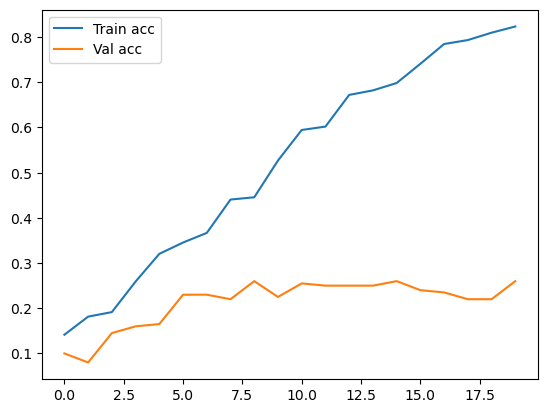

In [14]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.show()